In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [2]:
#url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
#response = requests.get(url)
#print(response.status_code)  # Should print 200 if the request was successful
#with open(r'C:\Users\Abdullahi Mujaheed\Desktop\mlzoom\car_data.csv', 'wb') as file:
   # file.write(response.content)'''

In [3]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [4]:
data = load_data(r'C:\Users\Abdullahi Mujaheed\Desktop\mlzoom\car_data.csv')
data.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [5]:
data = data[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

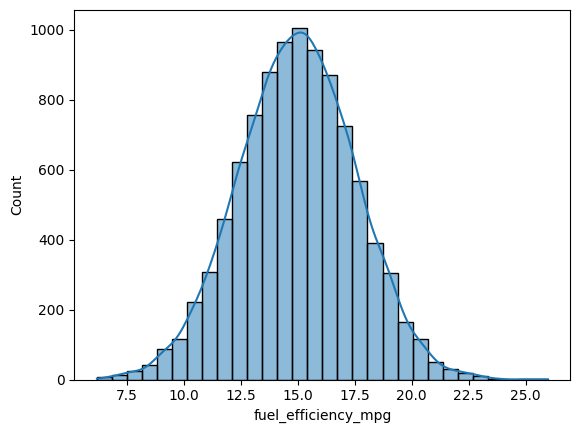

In [6]:
sns.histplot(data['fuel_efficiency_mpg'], bins= 30, kde = True)

In [7]:
data['fuel_efficiency_mpg'] = np.log1p(data['fuel_efficiency_mpg'])

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

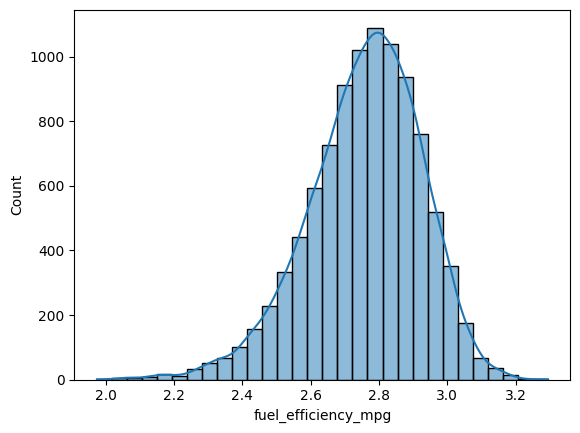

In [8]:
sns.histplot(data['fuel_efficiency_mpg'], bins= 30, kde = True)

the fuel efficiency column is uniformly distributed

In [9]:
data.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [10]:
print(data['horsepower'].median())

149.0


In [11]:
shuffled_data = data.sample(frac = 1, random_state = 42, ignore_index = True)
shuffled_data

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,2.870336
1,160,141.0,2741.170484,2019,2.850613
2,230,155.0,2471.880237,2017,2.975112
3,150,206.0,3748.164469,2015,2.550916
4,300,111.0,2135.716359,2006,3.015643
...,...,...,...,...,...
9699,210,163.0,1972.029124,2011,3.042696
9700,160,126.0,3011.588014,2009,2.750538
9701,290,187.0,2440.508039,2019,2.965502
9702,260,129.0,1865.404480,2019,3.068167


In [12]:
train, val, test = np.split(shuffled_data, [int(0.6*len(shuffled_data)), int(.8*len(shuffled_data))])

c:\Users\Abdullahi Mujaheed\Desktop\elevvo\elevvo-bootcamp\elevvo-venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
train_0 = train.fillna(0)
train_0

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,2.870336
1,160,141.0,2741.170484,2019,2.850613
2,230,155.0,2471.880237,2017,2.975112
3,150,206.0,3748.164469,2015,2.550916
4,300,111.0,2135.716359,2006,3.015643
...,...,...,...,...,...
5817,160,111.0,3038.134712,2002,2.721498
5818,160,157.0,2877.624938,2006,2.789816
5819,260,139.0,2606.972984,2009,2.888373
5820,280,132.0,4004.214323,2014,2.403253


In [14]:
train_mean = train.fillna(train['horsepower'].mean())
train_mean

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,2.870336
1,160,141.0,2741.170484,2019,2.850613
2,230,155.0,2471.880237,2017,2.975112
3,150,206.0,3748.164469,2015,2.550916
4,300,111.0,2135.716359,2006,3.015643
...,...,...,...,...,...
5817,160,111.0,3038.134712,2002,2.721498
5818,160,157.0,2877.624938,2006,2.789816
5819,260,139.0,2606.972984,2009,2.888373
5820,280,132.0,4004.214323,2014,2.403253


In [15]:
y_train = train['fuel_efficiency_mpg'].values
y_val = val['fuel_efficiency_mpg'].values
y_test = test['fuel_efficiency_mpg'].values
del train_0['fuel_efficiency_mpg']
del train_mean['fuel_efficiency_mpg']
del val['fuel_efficiency_mpg']
del test['fuel_efficiency_mpg']

In [16]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [17]:
params0_train = train_linear_regression(train_0.values, y_train)

In [18]:
params_mean_train = train_linear_regression(train_mean.values, y_train)

In [19]:
# Unpack weights
intercept_0, weights_0 = params0_train
intercept_mean, weights_mean = params_mean_train
print(intercept_0, weights_0)

print(intercept_mean, weights_mean)

3.6655768735601835 [ 2.18729438e-06  2.21223351e-04 -3.23467046e-04  1.60203188e-05]
3.671827537660378 [ 3.66895438e-06  6.65769842e-04 -3.23248374e-04 -2.18232772e-05]


In [39]:
# Compute predictions
y_pred_0 = intercept_0 + train_0.values.dot(weights_0)
y_pred_mean = intercept_mean + train_mean.values.dot(weights_mean)

# Compute RMSE
rmse_train_0 = np.sqrt(np.mean((y_pred_0 - y_train) ** 2))
rmse_train_mean = np.sqrt(np.mean((y_pred_mean - y_train) ** 2))

print(f'the rmse of train_0: {rmse_train_0}, \nthe rmse of train_mean: {rmse_train_mean}')

the rmse of train_0: 0.03909276558794462, 
the rmse of train_mean: 0.03581670894125062
